<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/04_MNIST_Basics/Linear_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook fastai==2.2.5
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.9MB/s 
     |████████████████████████████████| 194kB 15.4MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 1.2MB 15.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 12.8MB 43.3MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f17fa2b54d0>,
 torch.Size([12396, 784]),
 torch.Size([12396, 1]))

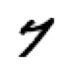

In [3]:
#Download training data
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([0]*len(stacked_threes)+ [1]*(len(stacked_sevens))).unsqueeze(1)
show_image(stacked_sevens[1]*255), train_x.shape, train_y.shape

In [4]:
#Download validation data
threes = (path/'valid'/'3').ls().sorted()
sevens = (path/'valid'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors[0: 600]).float()/255
stacked_threes = torch.stack(three_tensors[0: 600]).float()/255
valid_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
valid_y = tensor([0]*len(stacked_threes)+ [1]*(len(stacked_sevens))).unsqueeze(1)

In [5]:
#Create dataset with training data
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [6]:
#Create DataLoader of size 256 with dataset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [7]:
#Create datase anda dataloader with validation data
valid_dset = list(zip(valid_x,valid_y))
valid_dl = DataLoader(dset, batch_size=256)

In [22]:
#Take model from torch module
linear1 = torch.nn.Linear(28*28,1)

In [28]:
#See weight and bias
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [29]:
#Optimizer class
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [49]:
#Create optimizer object
lr = 1
opt = BasicOptim(linear1.parameters(), lr)

In [50]:
#Loss function
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [51]:
#Function to calculate gradients
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [52]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [53]:
#Function to see the accuracy of a batch
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [54]:
#Function to validate the accuracy of all the validatin DataLoader
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [55]:
#Try the function
validate_epoch(linear1)

0.4975

In [56]:
#train 20 epchs
for i in range(20):
    train_epoch(linear1)
    print(validate_epoch(linear1), end=' ')

0.9363 0.9516 0.9554 0.9571 0.9577 0.9582 0.9591 0.9593 0.9595 0.9599 0.9599 0.9601 0.96 0.9602 0.9603 0.9604 0.9603 0.9603 0.9604 0.9604 